# Logistic Regression
In this part of the exercise, we will build a logistic regression model to predict whether a students gets admitted into a university.

Suppose that you are the administrator of a university departerment and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

**Import third-party libraries and modules**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

from gradient import gradient
from plotData import plotData
from plotDecisionBoundary import plotDecisionBoundary
from sigmoid import sigmoid
from predict import predict
from costFunction import costFunction
from mapFeature import mapFeature

First, we have to get data from **ex2data1.txt** file using `numpy.loadtxt()` function in numpy library.

In [2]:
# Load data
# The first two columns contains the exam scores and the third column contains the labels
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

m = len(y)

y = np.reshape(y, (m, 1)) # convert list to numpy array

## 1. Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

The code in **plotData.py** using display a _Figure 1_, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

Plotting data with + indicating (y = 1) examples and o 
indicating (y = 0) examples.



Text(0.5, 1.0, 'Figure1: Scatter plot of training data')

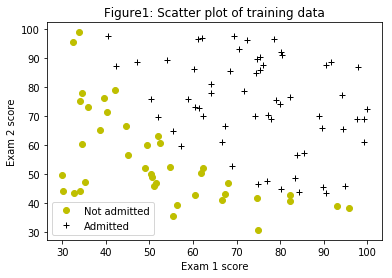

In [3]:
## ======================================== Plotting =========================================
# We start the exercises by first plotting the data to understand the
# problem we are working with
print('Plotting data with + indicating (y = 1) examples and o ')
print('indicating (y = 0) examples.\n')

plotData(X, y)

# Put some lables and legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Not admitted', 'Admitted'])
plt.title('Figure1: Scatter plot of training data')

## 2. Implementation
### 2.1 sigmoid function
Before we start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$
h_{\theta}(x) = g(\theta^{T}x)
$$

where function g is the sigmoid function. The sigmoid function is defined as:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

This function in **sigmoid.py** can be called by the rest of our program. For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluting sigmoid(0) should give us exactly 0.5. **For a matrix, our function should perform the sigmoid function on every element.**

### 2.2 Cost function and gradient
Recall that the cost function in logistic regression is

$$
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(h_{\theta}(x^{(i)})) - (1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))]
$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element 
(for $j = 0,1,...,n$) is defined as follows:

$$
\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m}\sum_{i=1}^{m}\big(h_{\theta}(x^{(i)}) - y^{(i)}\big)x_{j}^{(i)}
$$

Note that while gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_{\theta}(x)$.

Below, we call our *costFunction* using the initial parameters of $\theta$. we should see that the cost is about 0.693.

In [4]:
## ================================= Part 2: Compute cost and Gradient ===========================
# In this part of the exercise, you will implement the cost and gradient for logistic regression.

# Setup the data matrix approriately, and add ones for the intercept term
[m, n] = X.shape

# Add intercept
X = np.hstack((np.ones((m, 1)), X))

# Init fitting params
init_theta = np.zeros((n+1, 1))

# Compute and display initial cost and gradient
cost = costFunction(init_theta, X, y)
grad = gradient(init_theta, X, y, 0)

print('Cost at initial theta (zeros): %f\n' % (cost))
print('Exptected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): \n')
print(grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24], [0.2], [0.2]])
cost = costFunction(test_theta, X, y)
grad = gradient(test_theta, X, y, 0)

print('\nCost at test theta: %f\n' % (cost))
print('Exptected cost (approx): 0.218\n')
print('Gradient at test theta:\n')
print(grad)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at initial theta (zeros): 0.693147

Exptected cost (approx): 0.693

Gradient at initial theta (zeros): 

[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


Cost at test theta: 0.218330

Exptected cost (approx): 0.218

Gradient at test theta:

[[0.04290299]
 [2.56623412]
 [2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647



### 2.3  Learning parameters using *minimze* function (Scipy)
In the previous assigment, we found the optiaml parameters of a linear regression model by implementing gradient descent. We wrote a cost function and calculated its gradient, then took the gradient descent step accordingly. This time, instead of taking gradient descent steps, we will use an *minimize* function of **Scipy** library (a numercial library for python).

You can reference it at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

Here, we use **truncated Newton** algorithm to optimize our parameters. (https://docs.scipy.org/doc/scipy/reference/optimize.minimize-tnc.html#optimize-minimize-tnc)

In [5]:
## ================================ Part 3: Optimizing ======================================
# Find Optimal theta using Scipy library
# init_theta = np.zeros((n+1))

result = opt.minimize(costFunction, init_theta, args=(X,y), method='TNC', jac=False, options={'maxiter':400})

/home/hos-dsoft/Documents/TRAINING-COURSE/ml-training/Coursera-Machine-Learning/Python-Code/ex2/costFunction.py:20: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * ( (-1)*y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)) )


The opimization result represented as a `OptimizeResult` object (*result*).

The important attribute are: `x` the solution array. Below is our optimal result:

In [6]:
theta = result.x.reshape((n+1, 1))
print('Optimal Value of theta:\n')
print(theta)

Optimal Value of theta:

[[-25.14985698]
 [  0.20600616]
 [  0.20149558]]


In [7]:
cost = costFunction(theta, X, y)

# Print theta to screen
print('Cost at theta by minimize: %f\n' % (cost))
print('Expected cost (approx): 0.203\n\ntheta:\n')
print(theta)
print('Expected theta (approx):\n')
print('-25.161\n 0.206\n 0.201\n')

Cost at theta by minimize: 0.203498

Expected cost (approx): 0.203

theta:

[[-25.14985698]
 [  0.20600616]
 [  0.20149558]]
Expected theta (approx):

-25.161
 0.206
 0.201



This final $\theta$ value will then be used to plot the decision boundary on the training data, resulting in a figure similar to Figure 2.

**plotDecisionBoundary** function will help us plot this Figure below.

Text(0.5, 1.0, 'Figure2: Training data with decision boundary')

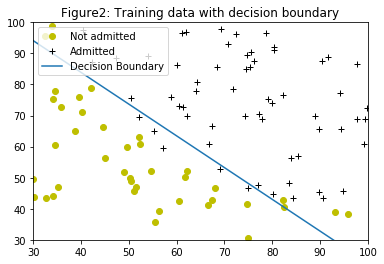

In [8]:
# Plot boundary
plotDecisionBoundary(theta, X, y)
# Legend, specific for the exercise
plt.legend(['Not admitted', 'Admitted', 'Decision Boundary'])
plt.axis([30, 100, 30, 100])
plt.title('Figure2: Training data with decision boundary')

### 2.4 Evaluating logistic regression
After learning the parameters, we can use the model to predict whether a particular student will be admitted.
For a student with an Exam 1 score of 45 and Exam 2 score of 85, we should expect to see an admission probability of 0.776

In [9]:
## =================================== Part 4: Predict and Accuracies =============================
# After learning the parameters, you will like to use it predict the outcomes
# on unseen data. In this part, you will use the logistic regression model
# to predict the probability that a student with score 45 on exam 1 and
# score 85 on exam 2 will be admitted.
#
# Furthermore, you will compute training and test set accuracies of
# our model.
#
# Predict probability for a student with score 45 on exam 1
# and score 85 on exam 2
prob = sigmoid(np.array([[1], [45], [85]]).T.dot(theta))
print('For a student with scores 45 and 85, we predict an admission ')
print('probability of %f\n' % (prob))
print('Expected value: 0.775 +/- 0.002\n\n')

For a student with scores 45 and 85, we predict an admission 
probability of 0.776874

Expected value: 0.775 +/- 0.002




Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set.

In [10]:
# Compute accuracy on our training set
p = predict(theta, X)

print('Train accuracy: %f\n' % (np.mean(np.double(p == y)) * 100))
print('Exptect accuracy (approx): 89.0\n')

Train accuracy: 89.000000

Exptect accuracy (approx): 89.0

